<a href="https://colab.research.google.com/github/ruturaj0626/ML_Bash/blob/main/Enhanced_SONAR_Rock_vs_Mine_Prediction_using_Iterative_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


SONAR_df = pd.read_csv("/content/sonar_data.csv",header=None)

In [124]:
SONAR_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [125]:
#SONAR_df[60] = SONAR_df[60].replace({'R': 'Rock', 'M': 'Mine'})
SONAR_df[60] = SONAR_df[60].replace({'R': '0', 'M': '1'}).astype(int)

In [126]:
SONAR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [127]:
SONAR_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.533654
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,1.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [128]:
SONAR_df[60].value_counts()

1    111
0     97
Name: 60, dtype: int64

In [129]:
SONAR_df.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
0,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024
1,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930


In [130]:
x = SONAR_df.drop(columns=60, axis=1)
y = SONAR_df[60]

In [131]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1,random_state=42,stratify = y)

In [132]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(xtrain,ytrain)

LogisticRegression()

In [133]:
from sklearn.metrics import accuracy_score


xtrain_pred = model.predict(xtrain)
train_acc = accuracy_score(xtrain_pred,ytrain)
print('Accuracy on training data : ', train_acc)

Accuracy on training data :  0.8235294117647058


In [134]:
xtest_pred = model.predict(xtest)
test_acc = accuracy_score(xtest_pred,ytest)
print('Accuracy on test data : ', test_acc)

Accuracy on test data :  0.7619047619047619


## Hyper Parameter Training


In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [136]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)

    train = model.score(xtrain, ytrain)
    test = model.score(xtest, ytest)

    print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
    print(classification_report(ytest, ypred))

    return model

In [137]:
dt = mymodel(DecisionTreeClassifier()) # Current Accuracy


parameters = {
    "criterion":["gini", "entropy"],
    "max_depth": list(range(1,50, 5)),
    "min_samples_leaf": list(range(1, 50, 5))
}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), parameters, verbose=2)
grid.fit(xtrain, ytrain)

Training Accuracy : 1.0
Testing Accuracy : 0.8571428571428571


              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.73      0.84        11

    accuracy                           0.86        21
   macro avg       0.88      0.86      0.86        21
weighted avg       0.89      0.86      0.86        21

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46],
                         'min_samples_leaf': [1, 6, 11, 16, 21, 26, 31, 36, 41,
                                              46]},
             verbose=2)

In [138]:
print("grid.best_params_", grid.best_params_)
print("grid.best_score_",grid.best_score_)
print("grid.best_estimator_",grid.best_estimator_)

dt2 = mymodel(grid.best_estimator_) # Post- HyperParameter Tuning For Decision Tree

grid.best_params_ {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 6}
grid.best_score_ 0.7385490753911806
grid.best_estimator_ DecisionTreeClassifier(max_depth=11, min_samples_leaf=6)
Training Accuracy : 0.9251336898395722
Testing Accuracy : 0.6666666666666666


              precision    recall  f1-score   support

           0       0.62      0.80      0.70        10
           1       0.75      0.55      0.63        11

    accuracy                           0.67        21
   macro avg       0.68      0.67      0.66        21
weighted avg       0.69      0.67      0.66        21



In [139]:
#Parameters SVM

parameters = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

In [140]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), parameters, verbose=3)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.541 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.541 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.541 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.541 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.541 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.541 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.526 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [141]:
print("grid.best_params_", grid.best_params_)
print("grid.best_score_",grid.best_score_)
print("grid.best_estimator_",grid.best_estimator_)

svm2 = mymodel(grid.best_estimator_) # Post- HyperParameter Tuning For Decision Tree

grid.best_params_ {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
grid.best_score_ 0.8605974395448079
grid.best_estimator_ SVC(C=1000, gamma=0.1)
Training Accuracy : 1.0
Testing Accuracy : 0.8571428571428571


              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.83      0.91      0.87        11

    accuracy                           0.86        21
   macro avg       0.86      0.85      0.86        21
weighted avg       0.86      0.86      0.86        21



In [142]:
#LogisticRegression

parameters = {
    'penalty' : ['l1','l2'],
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

grid = GridSearchCV(LogisticRegression(), parameters, verbose=2)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, sol

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END ..................C=100.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..................C=100.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..................C=100.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..................C=100.0, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ..............C=100.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=100.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=100.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=100.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=100.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .............C=1000.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .............C=1000.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .............C=1000.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .............C=1000

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=2)

In [143]:
print("grid.best_params_", grid.best_params_)
print("grid.best_score_",grid.best_score_)
print("grid.best_estimator_",grid.best_estimator_)

logreg2 = mymodel(grid.best_estimator_)

grid.best_params_ {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
grid.best_score_ 0.7809388335704125
grid.best_estimator_ LogisticRegression(solver='newton-cg')
Training Accuracy : 0.8235294117647058
Testing Accuracy : 0.7619047619047619


              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.80      0.73      0.76        11

    accuracy                           0.76        21
   macro avg       0.76      0.76      0.76        21
weighted avg       0.77      0.76      0.76        21



In [144]:
#KNN

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline(
    [
        ("sc", StandardScaler()),
        ("knn", KNeighborsClassifier())
    ]
)

parameters = [{"knn__n_neighbors": [3, 5, 7, 9],
              "knn__weights": ["uniform", "distance"],
              "knn__leaf_size": [15, 20]}]

grid = GridSearchCV(pipe, parameters, cv=5, scoring="accuracy")
grid.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__leaf_size': [15, 20],
                          'knn__n_neighbors': [3, 5, 7, 9],
                          'knn__weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [145]:
print("grid.best_params_", grid.best_params_)
print("grid.best_score_",grid.best_score_)
print("grid.best_estimator_",grid.best_estimator_)

knn2 = mymodel(grid.best_estimator_)

grid.best_params_ {'knn__leaf_size': 15, 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
grid.best_score_ 0.8125177809388335
grid.best_estimator_ Pipeline(steps=[('sc', StandardScaler()),
                ('knn', KNeighborsClassifier(leaf_size=15, n_neighbors=3))])
Training Accuracy : 0.9411764705882353
Testing Accuracy : 0.8571428571428571


              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.83      0.91      0.87        11

    accuracy                           0.86        21
   macro avg       0.86      0.85      0.86        21
weighted avg       0.86      0.86      0.86        21



In [146]:
# XGB parameters
"""
parameters = {'max_depth': [5,6,7,8],
'gamma': [0.01,0.001,0.001],
'min_child_weight':[1,5,10],
'learning_rate': [0.05,0.1, 0.2, 0.3],
'n_estimators':[5,10,20,100]}"""

#grid.best_params_
parameters = {'gamma': 0.001, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100}



grid = GridSearchCV(XGBClassifier(), parameters, verbose=2)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV] END gamma=0.01, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=5; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=5; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=5; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=5; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=5; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10; total time=   0.0s
[CV] END gamma=0.01, learning_rate=0.05, max_depth=5, min_chi

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0.01, 0.001, 0.001],
                         'learning_rate': [0.05, 0.1, 0.2, 0.3],
                         'max_depth': [5, 6, 7, 8],
                         'min_child_weight': [1, 5, 10],
                         'n_estimators': [5, 10, 20, 100]},
             verbose=2)

In [147]:
print("grid.best_params_", grid.best_params_)
print("grid.best_score_",grid.best_score_)
print("grid.best_estimator_",grid.best_estimator_)

xgb2 = mymodel(grid.best_estimator_)

grid.best_params_ {'gamma': 0.001, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100}
grid.best_score_ 0.8287339971550498
grid.best_estimator_ XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.001, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Training Accuracy : 1.0
Testing Accuracy : 0.8571428571428571


              pr

In [149]:
#Random Forest
'''
parameters = {
    'max_depth': [3, 5, 6, 7, 8],
    'max_features':[2,4,6,7,8,9],
    'n_estimators':[50,100],
    'min_samples_split': [3, 5, 6, 7]
}'''

#grid.best_params_
parameters = {'max_depth': [6], 'max_features': [4], 'min_samples_split': [3], 'n_estimators': [100]}

grid = GridSearchCV(RandomForestClassifier(), parameters, verbose=2)
grid.fit(xtrain, ytrain)

print("grid.best_params_", grid.best_params_)
print("grid.best_score_",grid.best_score_)
print("grid.best_estimator_",grid.best_estimator_)

rfc2 = mymodel(grid.best_estimator_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=6, max_features=4, min_samples_split=3, n_estimators=100; total time=   0.3s
[CV] END max_depth=6, max_features=4, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END max_depth=6, max_features=4, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END max_depth=6, max_features=4, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END max_depth=6, max_features=4, min_samples_split=3, n_estimators=100; total time=   0.2s
grid.best_params_ {'max_depth': 6, 'max_features': 4, 'min_samples_split': 3, 'n_estimators': 100}
grid.best_score_ 0.8233285917496443
grid.best_estimator_ RandomForestClassifier(max_depth=6, max_features=4, min_samples_split=3)
Training Accuracy : 1.0
Testing Accuracy : 0.9047619047619048


              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.91      0.91      0.91        11

    

In [151]:
from sklearn.model_selection import cross_val_score

knn_accuracy = cross_val_score(knn2,xtest,ytest,cv=3,scoring='accuracy')
logreg_accuracy = cross_val_score(logreg2,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
svm_accuracy = cross_val_score(svm2,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
dt_accuracy = cross_val_score(dt2,xtest,ytest,cv=3,scoring='accuracy',n_jobs=-1)
rfc_accuracy = cross_val_score(rfc2,xtest,ytest,cv=3,scoring='accuracy')
xgb_accuracy = cross_val_score(xgb2,xtest,ytest,cv=3,scoring='accuracy')

In [152]:
names = ['KNN','LogReg','SVM','DecisionTree','RFC','XGB']
score =[knn_accuracy.mean(),logreg_accuracy.mean(),svm_accuracy.mean(),dt_accuracy.mean(),rfc_accuracy.mean(),xgb_accuracy.mean()]

In [153]:
scores_2nd = pd.DataFrame({'Algorithm Name':names,'Score':score})

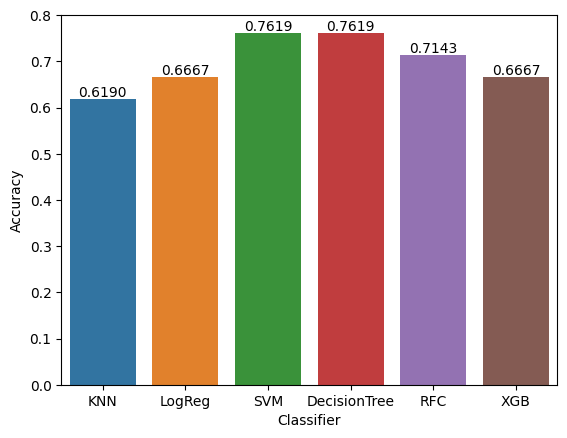

In [155]:
import seaborn as sns
axis = sns.barplot(x='Algorithm Name',y='Score',data = scores_2nd)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center")

In [185]:
xtest

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
131,0.1150,0.1163,0.0866,0.0358,0.0232,0.1267,0.2417,0.2661,0.4346,0.5378,...,0.0228,0.0099,0.0065,0.0085,0.0166,0.0110,0.0190,0.0141,0.0068,0.0086
88,0.0274,0.0242,0.0621,0.0560,0.1129,0.0973,0.1823,0.1745,0.1440,0.1808,...,0.0255,0.0113,0.0108,0.0085,0.0047,0.0074,0.0104,0.0161,0.0220,0.0173
169,0.0130,0.0120,0.0436,0.0624,0.0428,0.0349,0.0384,0.0446,0.1318,0.1375,...,0.0024,0.0084,0.0100,0.0018,0.0035,0.0058,0.0011,0.0009,0.0033,0.0026
199,0.0116,0.0744,0.0367,0.0225,0.0076,0.0545,0.1110,0.1069,0.1708,0.2271,...,0.0202,0.0141,0.0103,0.0100,0.0034,0.0026,0.0037,0.0044,0.0057,0.0035
92,0.0260,0.0192,0.0254,0.0061,0.0352,0.0701,0.1263,0.1080,0.1523,0.1630,...,0.0132,0.0118,0.0120,0.0051,0.0070,0.0015,0.0035,0.0008,0.0044,0.0077
74,0.0109,0.0093,0.0121,0.0378,0.0679,0.0863,0.1004,0.0664,0.0941,0.1036,...,0.0124,0.0077,0.0023,0.0117,0.0053,0.0077,0.0076,0.0056,0.0055,0.0039
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
51,0.0131,0.0068,0.0308,0.0311,0.0085,0.0767,0.0771,0.0640,0.0726,0.0901,...,0.0109,0.0062,0.0028,0.0040,0.0075,0.0039,0.0053,0.0013,0.0052,0.0023
137,0.0430,0.0902,0.0833,0.0813,0.0165,0.0277,0.0569,0.2057,0.3887,0.7106,...,0.0208,0.0176,0.0197,0.0210,0.0141,0.0049,0.0027,0.0162,0.0059,0.0021
177,0.0201,0.0165,0.0344,0.0330,0.0397,0.0443,0.0684,0.0903,0.1739,0.2571,...,0.0125,0.0054,0.0057,0.0137,0.0109,0.0035,0.0056,0.0105,0.0082,0.0036


In [196]:
xtest.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
131,0.1150,0.1163,0.0866,0.0358,0.0232,0.1267,0.2417,0.2661,0.4346,0.5378,...,0.0228,0.0099,0.0065,0.0085,0.0166,0.0110,0.0190,0.0141,0.0068,0.0086
88,0.0274,0.0242,0.0621,0.0560,0.1129,0.0973,0.1823,0.1745,0.1440,0.1808,...,0.0255,0.0113,0.0108,0.0085,0.0047,0.0074,0.0104,0.0161,0.0220,0.0173
169,0.0130,0.0120,0.0436,0.0624,0.0428,0.0349,0.0384,0.0446,0.1318,0.1375,...,0.0024,0.0084,0.0100,0.0018,0.0035,0.0058,0.0011,0.0009,0.0033,0.0026
199,0.0116,0.0744,0.0367,0.0225,0.0076,0.0545,0.1110,0.1069,0.1708,0.2271,...,0.0202,0.0141,0.0103,0.0100,0.0034,0.0026,0.0037,0.0044,0.0057,0.0035
92,0.0260,0.0192,0.0254,0.0061,0.0352,0.0701,0.1263,0.1080,0.1523,0.1630,...,0.0132,0.0118,0.0120,0.0051,0.0070,0.0015,0.0035,0.0008,0.0044,0.0077


In [229]:
xx_index = xtest.index.tolist()

In [244]:
# Given input data
input_data = xtest.loc[random.choice(xx_index)]
print(input_data.values)
# Convert input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Assuming `model` is defined and loaded previously
prediction = model.predict(input_data_reshaped)

# Print the raw prediction
print("Raw Prediction:", prediction)

# Interpret the prediction and print the result
if prediction[0] == 'R':
    print('The object is a Rock')
else:
    print('The object is a Mine')


[0.0335 0.0134 0.0696 0.118  0.0348 0.118  0.1948 0.1607 0.3036 0.4372
 0.5533 0.5771 0.7022 0.7067 0.7367 0.7391 0.8622 0.9458 0.8782 0.7913
 0.576  0.3061 0.0563 0.0239 0.2554 0.4862 0.5027 0.4402 0.2847 0.1797
 0.356  0.3522 0.3321 0.3112 0.3638 0.0754 0.1834 0.182  0.1815 0.1593
 0.0576 0.0954 0.1086 0.0812 0.0784 0.0487 0.0439 0.0586 0.037  0.0185
 0.0302 0.0244 0.0232 0.0093 0.0159 0.0193 0.0032 0.0377 0.0126 0.0156]
Raw Prediction: [0]
The object is a Mine
